#### Auth - Drive authenticate

In [1]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

#### Import

In [2]:
import requests, pandas as pd, numpy as np
from requests import session
import networkx as nx
import matplotlib.pyplot as plt
import itertools
import random
import seaborn as sns
from matplotlib.pyplot import figure
from collections import Counter
from scipy import stats
import decimal
from decimal import *
import matplotlib.font_manager as fm
from google.colab import files

#### Read data

In [3]:
network_all = gc.open_by_key('1c5_rTfNYg9NYUiqP28XQo1xALqwZNNUiTdSKqy_zX5Y')
edges_all = network_all.worksheet('edges')
data = edges_all.get_all_values()
df_all = pd.DataFrame(data)
df_all = df_all.rename(columns=df_all.iloc[0]).drop(df_all.index[0])
df_all["Weight"]=df_all["Weight"].str.replace(',','.')
df_all[["Weight"]] = df_all[["Weight"]].apply(pd.to_numeric)

In [4]:
# 2012
df2012 = df_all.loc[df_all['Timeset'] == '2012']
df2012 = df2012[df2012['Weight'] < 1]

In [5]:
# 2007
df2007 = df_all.loc[df_all['Timeset'] == '2007']
df2007 = df2007[df2007['Weight'] < 1]

In [6]:
#node names
nodes_all = network_all.worksheet('nodes')
data = nodes_all.get_all_values()
names = pd.DataFrame(data)
names = names.rename(columns=names.iloc[0]).drop(names.index[0])

### TOP nodes according to cut-off

In [ ]:
i=0.0
b=[]
while i<=0.1:
  b.append(i)
  i=i+0.02

#### 2012

In [ ]:
top2012_out=pd.DataFrame()
top2012_in=pd.DataFrame()
top2012_outw=pd.DataFrame()
top2012_inw=pd.DataFrame()
pagerank2012_in=pd.DataFrame()
pagerank2012_out=pd.DataFrame()
eigenvector2012_out=pd.DataFrame()

for w in b:
    df_cut = df2012[df2012['Weight'] > w]

    G_cut = nx.DiGraph()
    G_cut.add_nodes_from(df_cut['Source'])
    G_cut.add_nodes_from(df_cut['Target'])

    G_cut= nx.from_pandas_edgelist(df_cut,'Source','Target', edge_attr='Weight', create_using=nx.DiGraph)

    #simple
    #top-outdegree
    df_out=pd.DataFrame(sorted(G_cut.out_degree, key=lambda x: x[1], reverse=True))
    df_out.columns = ['ID', 'Out-degree']
    df_out['Cut-off']="%.2f" % w
    top2012_out = top2012_out.append(df_out, ignore_index=True)
    #top-indegree
    df_in=pd.DataFrame(sorted(G_cut.in_degree, key=lambda x: x[1], reverse=True))
    df_in.columns = ['ID', 'In-degree']
    df_in['Cut-off']="%.2f" % w
    top2012_in = top2012_in.append(df_in, ignore_index=True)

    #weighted
    #top-outdegree
    df_outw=pd.DataFrame(sorted(G_cut.out_degree(weight='Weight'), key=lambda x: x[1], reverse=True))
    df_outw.columns = ['ID', 'Weighted out-degree']
    df_outw['Cut-off']="%.2f" % w
    top2012_outw = top2012_outw.append(df_outw, ignore_index=True)
    #top-indegree
    df_inw=pd.DataFrame(sorted(G_cut.in_degree(weight='Weight'), key=lambda x: x[1], reverse=True))
    df_inw.columns = ['ID', 'Weighted in-degree']
    df_inw['Cut-off']="%.2f" % w
    top2012_inw = top2012_inw.append(df_inw, ignore_index=True)

    #pagerank | in-degree
    pagerank_dict_in=nx.pagerank(G_cut, weight='Weight')
    df_pagerank_in=pd.DataFrame(list(pagerank_dict_in.items()), columns=['ID','pagerank'])
    df_pagerank_in= df_pagerank_in.sort_values(by=['pagerank'], ascending=False)
    df_pagerank_in['Cut-off']="%.2f" % w
    pagerank2012_in = pagerank2012_in.append(df_pagerank_in, ignore_index=True)

    #pagerank | out-degree (reversed graph)
    pagerank_dict_out=nx.pagerank(G_cut.reverse(), weight='Weight')
    df_pagerank_out=pd.DataFrame(list(pagerank_dict_out.items()), columns=['ID','pagerank'])
    df_pagerank_out= df_pagerank_out.sort_values(by=['pagerank'], ascending=False)
    df_pagerank_out['Cut-off']="%.2f" % w
    pagerank2012_out = pagerank2012_out.append(df_pagerank_out, ignore_index=True)

    #eigenvector | out-degree (reversed graph)
    eigenvector_dict_out=nx.eigenvector_centrality(G_cut.reverse(), weight='Weight',  max_iter=700)
    df_eigenvector_out=pd.DataFrame(list(eigenvector_dict_out.items()), columns=['ID','eigenvector'])
    df_eigenvector_out= df_eigenvector_out.sort_values(by=['eigenvector'], ascending=False)
    df_eigenvector_out['Cut-off']="%.2f" % w
    eigenvector2012_out = eigenvector2012_out.append(df_eigenvector_out, ignore_index=True)

In [ ]:
top2012_in=top2012_in.merge(names, on='ID', how='left')
top2012_out=top2012_out.merge(names, on='ID', how='left')
top2012_inw=top2012_inw.merge(names, on='ID', how='left')
top2012_outw=top2012_outw.merge(names, on='ID', how='left')
pagerank2012_out= pagerank2012_out.merge(names, on='ID', how='left')
pagerank2012_in= pagerank2012_in.merge(names, on='ID', how='left')
eigenvector2012_out= eigenvector2012_out.merge(names, on='ID', how='left')

In [ ]:
#simple degree
top2012 = gc.open_by_key('1qN6O_tgsUmzPhFnNCy8FdUua2anZ-LNLDYcb-RkJC-M')
worksheet_in2012 = top2012.get_worksheet(0)
worksheet_out2012 = top2012.get_worksheet(1)
set_with_dataframe(worksheet_in2012, top2012_in)
set_with_dataframe(worksheet_out2012, top2012_out)

In [ ]:
#weighted in-degree
top2012 = gc.open_by_key('1avU_tbRq5HWzGNzcAz3S4BjC6f3hPggvcWBRj1jazOg')
worksheet_in2012 = top2012.get_worksheet(0)
worksheet_out2012 = top2012.get_worksheet(1)
set_with_dataframe(worksheet_in2012 , top2012_inw)
set_with_dataframe(worksheet_out2012 , top2012_outw)

In [ ]:
#pagerank
top2012 = gc.open_by_key('1FX5K6JlPAomHt1xy7whMxrFNqUo-XNEV6au2Gbh2tyc')
worksheet_in2012 = top2012.get_worksheet(0)
worksheet_out2012 = top2012.get_worksheet(1)
set_with_dataframe(worksheet_in2012 , pagerank2012_in)
set_with_dataframe(worksheet_out2012 , pagerank2012_out)

In [ ]:
#eigenvector
top2012 = gc.open_by_key('1M_SwR_Rt8v2DfoJA7ITgPAhVz0nIXMTV3AL7bMAJ5OU')
worksheet_out2012 = top2012.get_worksheet(0)
set_with_dataframe(worksheet_out2012 , eigenvector2012_out)

#### 2007

In [ ]:
top2007_out=pd.DataFrame()
top2007_in=pd.DataFrame()
top2007_outw=pd.DataFrame()
top2007_inw=pd.DataFrame()
pagerank2007_in=pd.DataFrame()
pagerank2007_out=pd.DataFrame()
eigenvector2007_out=pd.DataFrame()

for w in b:
    df_cut = df2007[df2007['Weight'] > w]

    G_cut = nx.DiGraph()
    G_cut.add_nodes_from(df_cut['Source'])
    G_cut.add_nodes_from(df_cut['Target'])
    G_cut= nx.from_pandas_edgelist(df_cut,'Source','Target', edge_attr='Weight', create_using=nx.DiGraph)

    #top-outdegree
    df_out=pd.DataFrame(sorted(G_cut.out_degree, key=lambda x: x[1], reverse=True))
    df_out.columns = ['ID', 'Out-degree']
    df_out['w']="%.2f" % w
    top2007_out = top2007_out.append(df_out, ignore_index=True)

    #top-indegree
    df_in=pd.DataFrame(sorted(G_cut.in_degree, key=lambda x: x[1], reverse=True))
    df_in.columns = ['ID', 'In-degree']
    df_in['w']="%.2f" % w
    top2007_in = top2007_in.append(df_in, ignore_index=True)

    #weighted
    #top-outdegree
    df_outw=pd.DataFrame(sorted(G_cut.out_degree(weight='Weight'), key=lambda x: x[1], reverse=True))
    df_outw.columns = ['ID', 'Weighted out-degree']
    #topoutw=df_outw.head(100)
    df_outw['Cut-off']="%.2f" % w
    top2007_outw = top2007_outw.append(df_outw, ignore_index=True)
    #top-indegree
    df_inw=pd.DataFrame(sorted(G_cut.in_degree(weight='Weight'), key=lambda x: x[1], reverse=True))
    df_inw.columns = ['ID', 'Weighted in-degree']
    df_inw['Cut-off']="%.2f" % w
    top2007_inw = top2007_inw.append(df_inw, ignore_index=True)

    #pagerank | in-degree
    pagerank_dict_in=nx.pagerank(G_cut, weight='Weight')
    df_pagerank_in=pd.DataFrame(list(pagerank_dict_in.items()), columns=['ID','pagerank'])
    df_pagerank_in= df_pagerank_in.sort_values(by=['pagerank'], ascending=False)
    df_pagerank_in['Cut-off']="%.2f" % w
    pagerank2007_in = pagerank2007_in.append(df_pagerank_in, ignore_index=True)

    #pagerank | out-degree (reversed graph)
    pagerank_dict_out=nx.pagerank(G_cut.reverse(), weight='Weight')
    df_pagerank_out=pd.DataFrame(list(pagerank_dict_out.items()), columns=['ID','pagerank'])
    df_pagerank_out= df_pagerank_out.sort_values(by=['pagerank'], ascending=False)
    df_pagerank_out['Cut-off']="%.2f" % w
    pagerank2007_out = pagerank2007_out.append(df_pagerank_out, ignore_index=True)

    #eigenvector | out-degree (reversed graph)
    eigenvector_dict_out=nx.eigenvector_centrality(G_cut.reverse(), weight='Weight',  max_iter=700)
    df_eigenvector_out=pd.DataFrame(list(eigenvector_dict_out.items()), columns=['ID','eigenvector'])
    df_eigenvector_out= df_eigenvector_out.sort_values(by=['eigenvector'], ascending=False)
    df_eigenvector_out['Cut-off']="%.2f" % w
    eigenvector2007_out = eigenvector2007_out.append(df_eigenvector_out, ignore_index=True)

In [ ]:
top2007_in=top2007_in.merge(names, on='ID', how='left')
top2007_out=top2007_out.merge(names, on='ID', how='left')
top2007_inw=top2007_inw.merge(names, on='ID', how='left')
top2007_outw=top2007_outw.merge(names, on='ID', how='left')
pagerank2007_out= pagerank2007_out.merge(names, on='ID', how='left')
pagerank2007_in= pagerank2007_in.merge(names, on='ID', how='left')
eigenvector2007_out= eigenvector2007_out.merge(names, on='ID', how='left')

In [ ]:
#simple degree
top2007 = gc.open_by_key('19ydjEmPMV9w6Q0ebVHtKjsfeYVLVqD_MJ8qzX749X5A')
worksheet_in2007 = top2007.get_worksheet(0)
worksheet_out2007 = top2007.get_worksheet(1)
set_with_dataframe(worksheet_in2007 , top2007_in)
set_with_dataframe(worksheet_out2007 , top2007_out)

In [ ]:
#weighted in-degree
top2007 = gc.open_by_key('1WXcn5AylHh9otFc4rw7uWNIoRuG3bQfYsrdF8PozDWc')
worksheet_in2007 = top2007.get_worksheet(0)
worksheet_out2007 = top2007.get_worksheet(1)
set_with_dataframe(worksheet_in2007 , top2007_inw)
set_with_dataframe(worksheet_out2007 , top2007_outw)

In [ ]:
#pagerank
top2007 = gc.open_by_key('1NfQaC7CfrmoUeKubsOXZuYFvykXtshL1Estta5NIgJk')
worksheet_in2007 = top2007.get_worksheet(0)
worksheet_out2007 = top2007.get_worksheet(1)
set_with_dataframe(worksheet_in2007 , pagerank2007_in)
set_with_dataframe(worksheet_out2007 , pagerank2007_out)

In [ ]:
#eigenvector
top2007 = gc.open_by_key('1BTO5giXfNY1OTZ0GteP4nnmlYJAO8815wcGUmC_3Y_0')
worksheet_out2007 = top2007.get_worksheet(0)
set_with_dataframe(worksheet_out2007 , eigenvector2007_out)

### Distribution plotting

#### In-degree

In [7]:
df_cut = df2012[df2012['Weight'] > 0.0]

G_cut = nx.DiGraph()
G_cut.add_nodes_from(df_cut['Source'])
G_cut.add_nodes_from(df_cut['Target'])

G_cut= nx.from_pandas_edgelist(df_cut,'Source','Target', edge_attr='Weight', create_using=nx.DiGraph)

In [8]:
degrees_G_cut = [G_cut.in_degree(n, weight='Weight') for n in G_cut.nodes()]

degrees_G_cut=np.array(degrees_G_cut)

In [9]:
if min(degrees_G_cut)>0:
  kmin=min(degrees_G_cut)
else:
  kmin=1
kmax = max(degrees_G_cut)

bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

density, _ = np.histogram(degrees_G_cut, bins=bin_edges, density=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

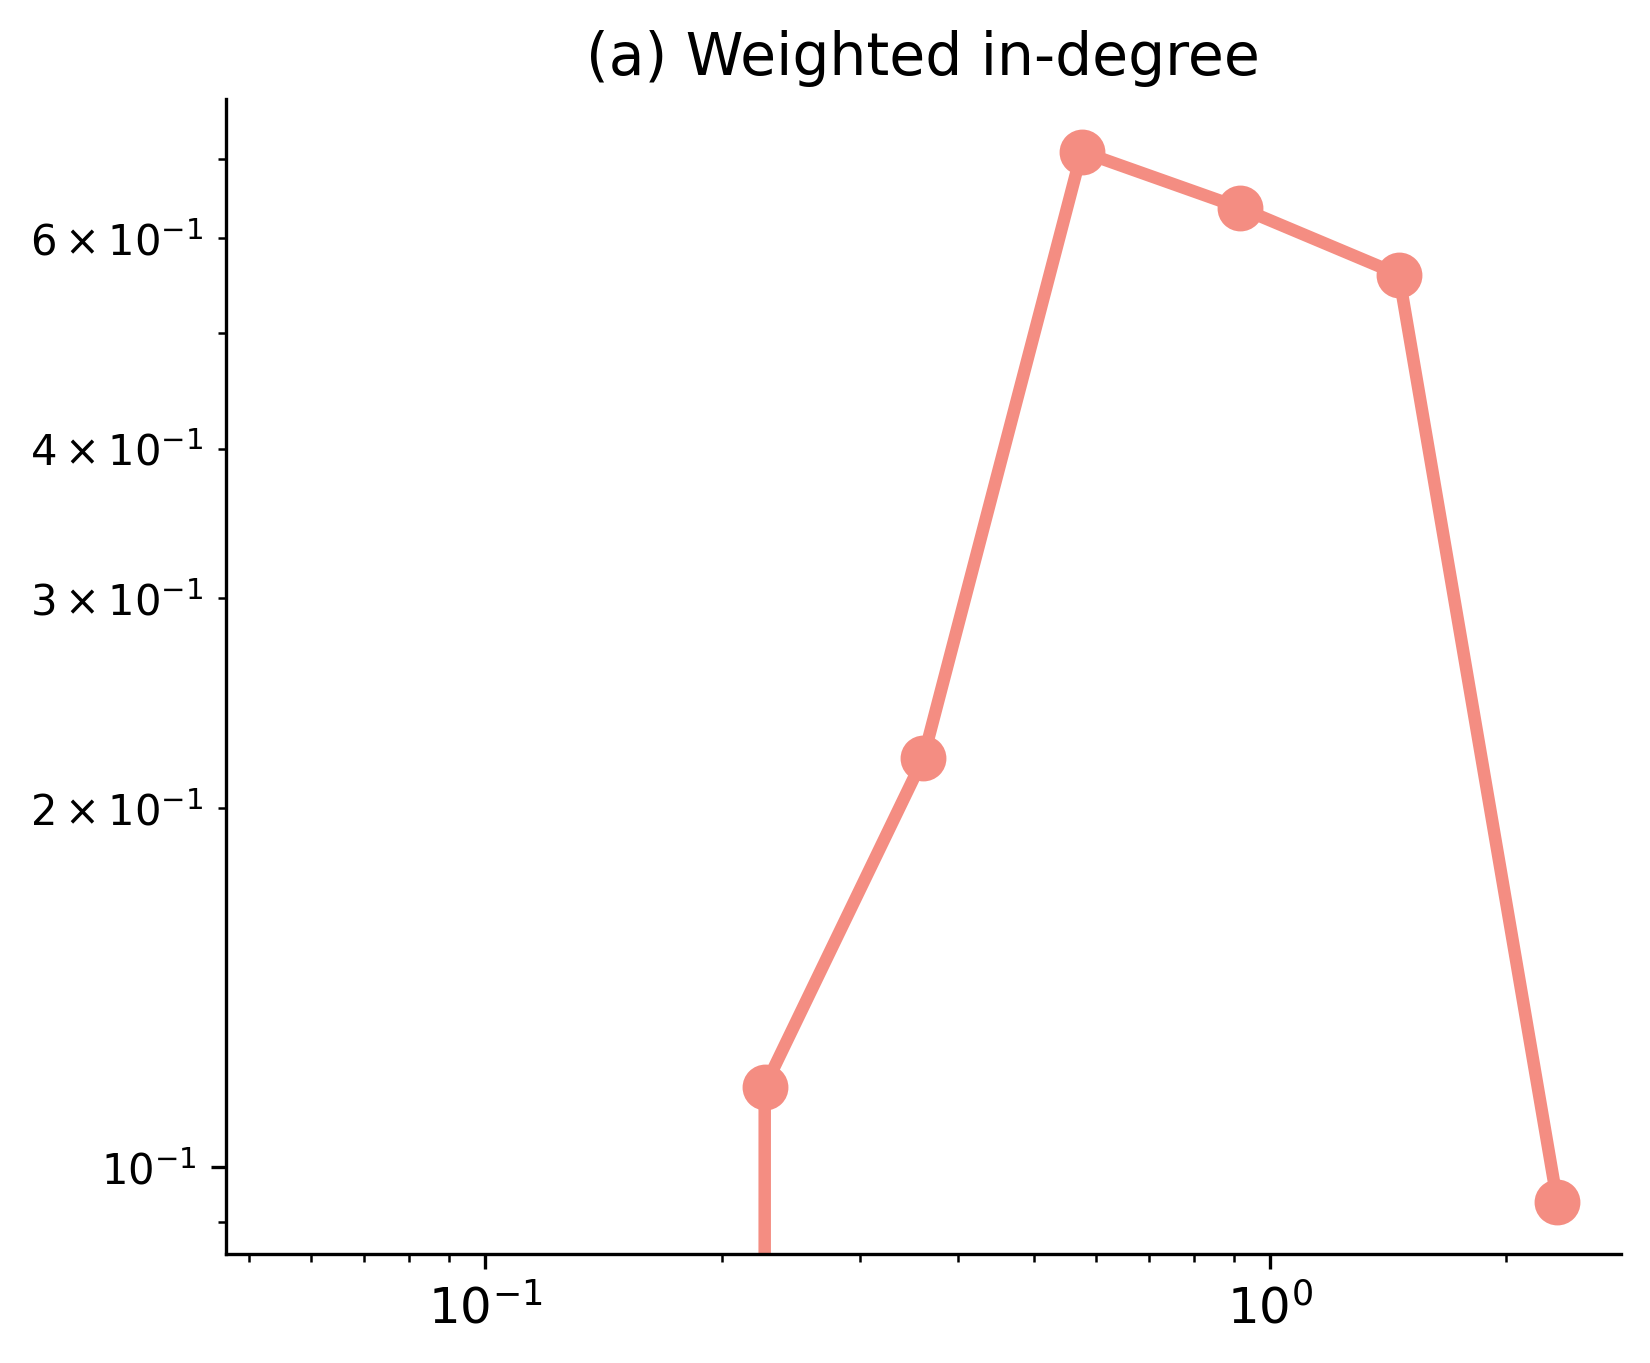

In [10]:
plt.figure(figsize=(6, 5), dpi=300)

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.title('(a) Weighted in-degree', size=14)
plt.xticks(fontsize=12)

plt.loglog(x, density, '#F48D82', linestyle='solid', marker='o', linewidth=3, markersize=10)

ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.savefig('distr-2012-in.png', dpi=1200)
files.download('distr-2012-in.png')

#### Out-degree

In [11]:
df_cut = df2012[df2012['Weight'] > 0.0]

G_cut = nx.DiGraph()
G_cut.add_nodes_from(df_cut['Source'])
G_cut.add_nodes_from(df_cut['Target'])

G_cut= nx.from_pandas_edgelist(df_cut,'Source','Target', edge_attr='Weight', create_using=nx.DiGraph)

In [12]:
degrees_G_cut = [G_cut.out_degree(n, weight='Weight') for n in G_cut.nodes()]

degrees_G_cut=np.array(degrees_G_cut)

In [13]:
if min(degrees_G_cut)>0:
  kmin=min(degrees_G_cut)
else:
  kmin=1
kmax = max(degrees_G_cut)

bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)

density, _ = np.histogram(degrees_G_cut, bins=bin_edges, density=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

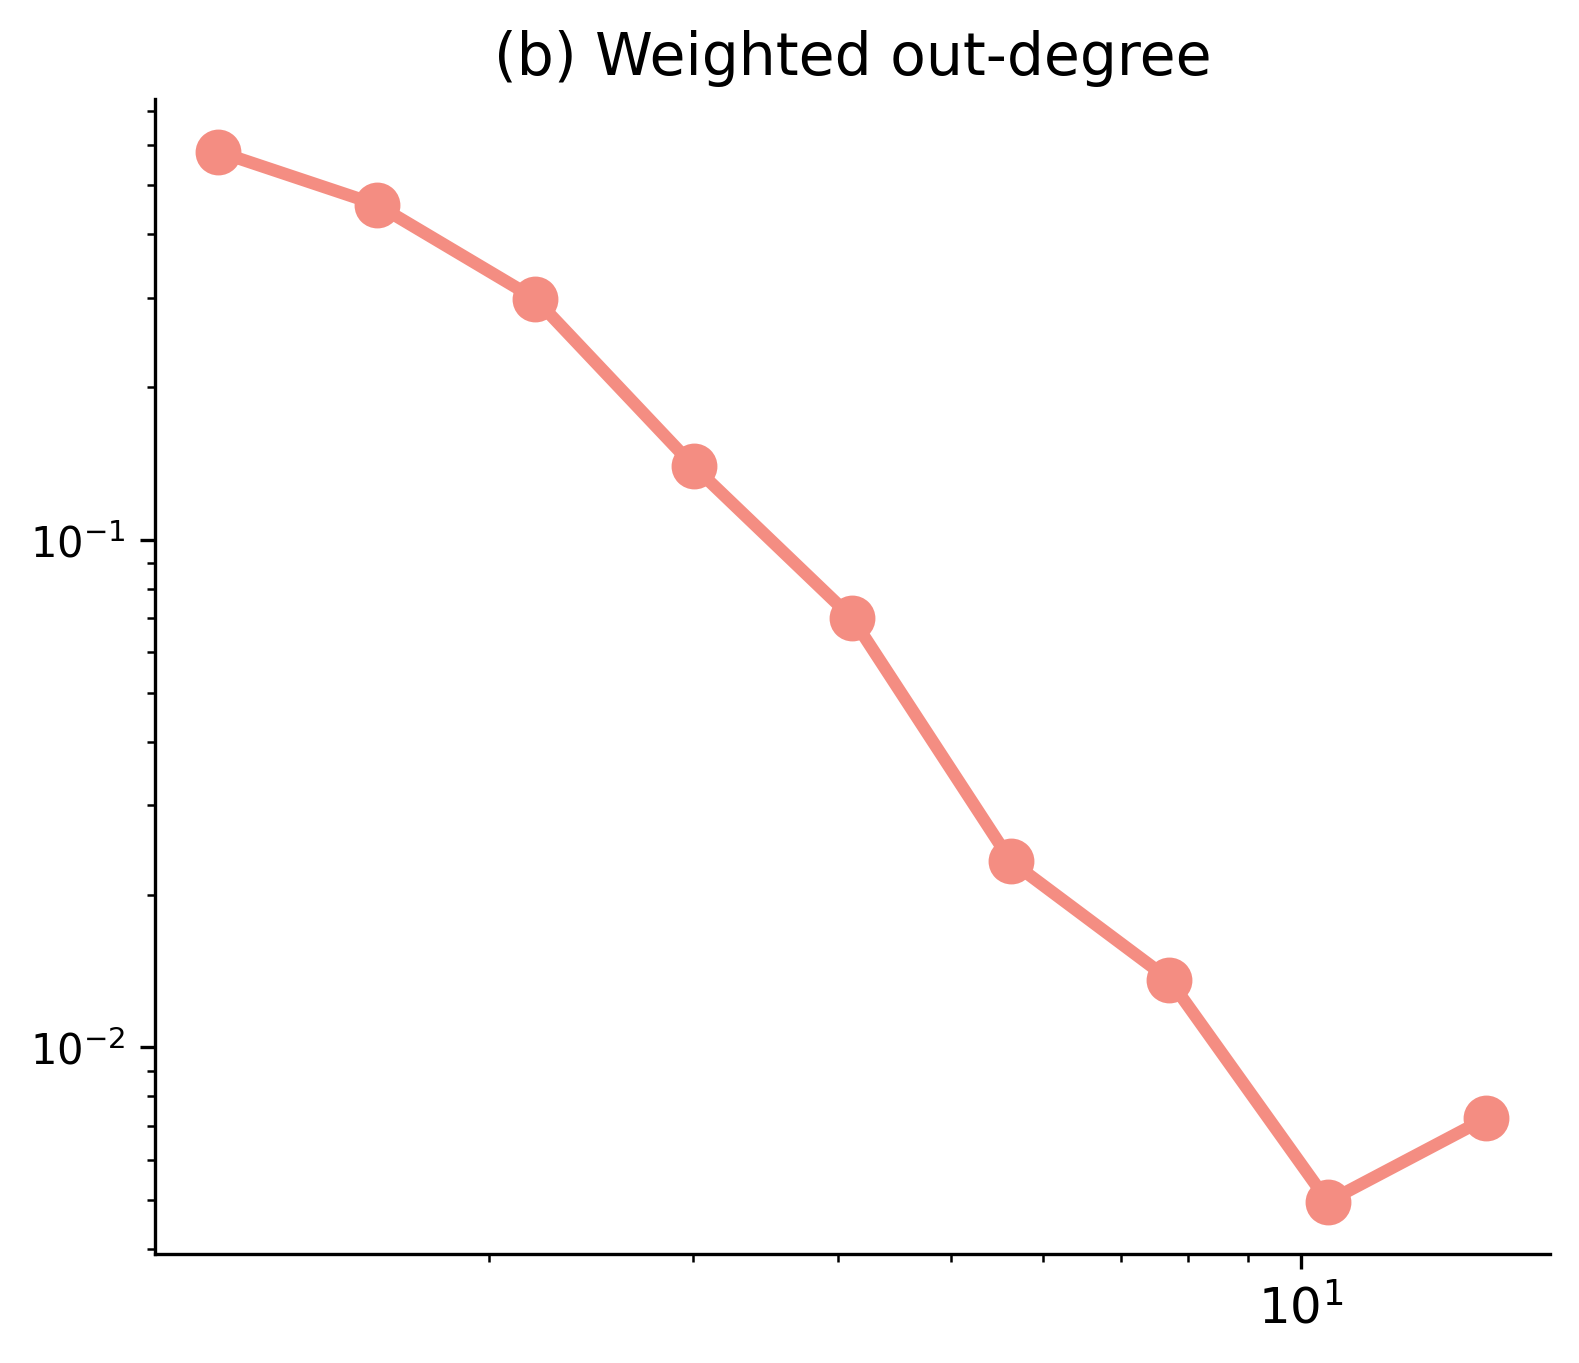

In [14]:
plt.figure(figsize=(6, 5), dpi=300)

log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.title('(b) Weighted out-degree', size=14)
plt.xticks(fontsize=12)

plt.loglog(x, density, '#F48D82', linestyle='solid',marker='o', linewidth=3, markersize=10)

ax = plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.savefig('distr-2012-out.png', dpi=1200)
files.download('distr-2012-out.png')

### Visualization data

In [ ]:
df_cut = df2012[df2012['Weight'] > 0.1]

G_cut = nx.DiGraph()
G_cut.add_nodes_from(df_cut['Source'])
G_cut.add_nodes_from(df_cut['Target'])

G_cut= nx.from_pandas_edgelist(df_cut,'Source','Target', edge_attr='Weight', create_using=nx.DiGraph)

#weighted
#top-outdegree
df_outw=pd.DataFrame(sorted(G_cut.out_degree(weight='Weight'), key=lambda x: x[1], reverse=True))
df_outw.columns = ['ID', 'Weighted out-degree']

#pagerank | out-degree (reversed graph)
pagerank_dict_out=nx.pagerank(G_cut.reverse(), weight='Weight')
df_pagerank_out=pd.DataFrame(list(pagerank_dict_out.items()), columns=['ID','pagerank'])
df_pagerank_out= df_pagerank_out.sort_values(by=['pagerank'], ascending=False)

#eigenvector | out-degree (reversed graph)
eigenvector_dict_out=nx.eigenvector_centrality(G_cut.reverse(), weight='Weight',  max_iter=700)
df_eigenvector_out=pd.DataFrame(list(eigenvector_dict_out.items()), columns=['ID','eigenvector'])
df_eigenvector_out= df_eigenvector_out.sort_values(by=['eigenvector'], ascending=False)

In [ ]:
df_outw=df_outw.merge(df_pagerank_out, on='ID', how='left')
df_outw=df_outw.merge(df_eigenvector_out, on='ID', how='left')
df_outw=df_outw.merge(names, on='ID', how='left')
nodes=df_outw

In [ ]:
names2=names[['ID','Label']]

In [ ]:
edges=pd.merge(df_cut, names2, left_on='Source', right_on='ID')
edges=pd.merge(edges, names2, left_on='Target', right_on='ID')

In [ ]:
network_spreadsheet = gc.open_by_key('1UnMbzYkL6M94oZ5LkbuTKIzpkbe3c8UFBWlRuUJMN48')
worksheet_nodes = network_spreadsheet.get_worksheet(0)
worksheet_edges = network_spreadsheet.get_worksheet(1)
set_with_dataframe(worksheet_nodes, nodes)
set_with_dataframe(worksheet_edges, edges)